# Dengue Exploritory Analysis

**1. Prepare Workspace**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style='darkgrid', font='monospace')
%matplotlib inline

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import operator
import statistics
green, orange = '#00A57B', '#EF5300'

In [2]:
# Import data
features = pd.read_csv('dengue_features_train.csv')
labels = pd.read_csv('dengue_labels_train.csv')
df = features.merge(labels, how='outer', on=['city', 'year', 'weekofyear'])

**2. Get Information About Data**

In [3]:
# Get information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [6]:
# Get description of data
df.describe()['total_cases']

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

In [5]:
# Check variance
statistics.variance(df['total_cases'])

1900.6112302216684

In [5]:
# Get head of data
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


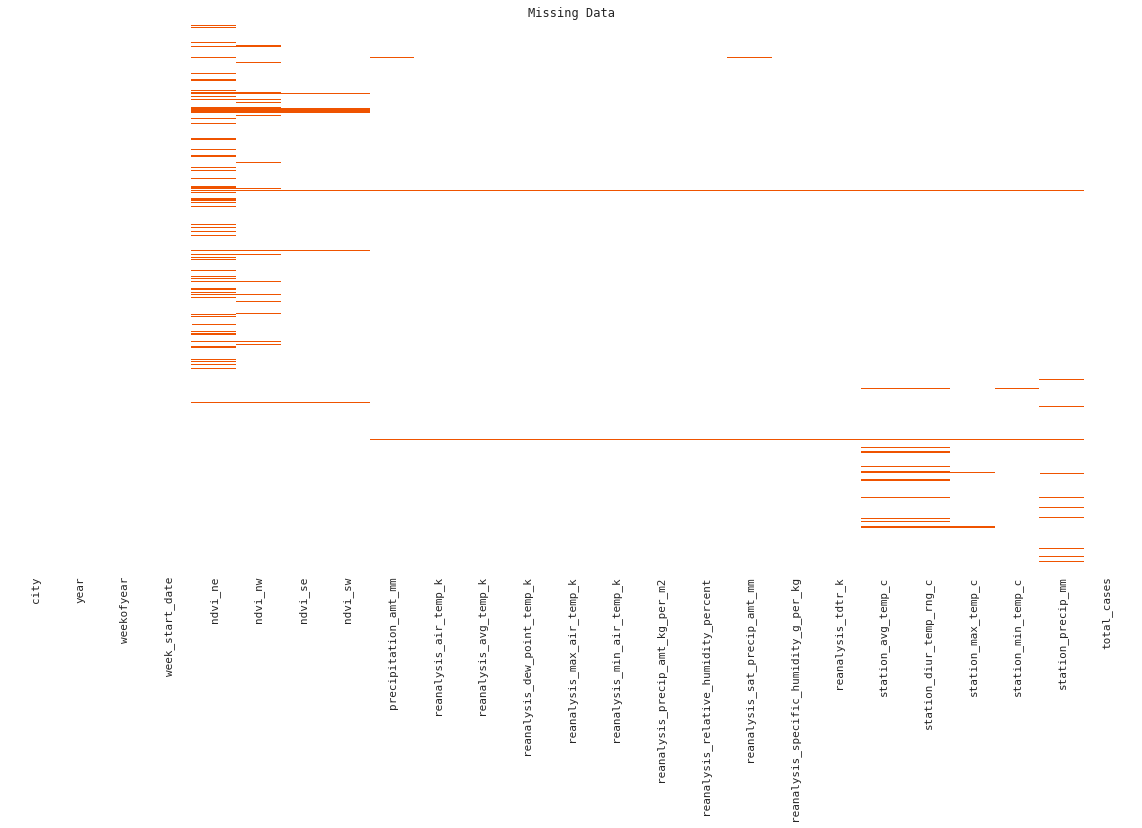

In [6]:
# See missing data
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap=['white', orange])
plt.title('Missing Data')

sns.set(style='white', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

**3. Perform Exploratory Analysis**

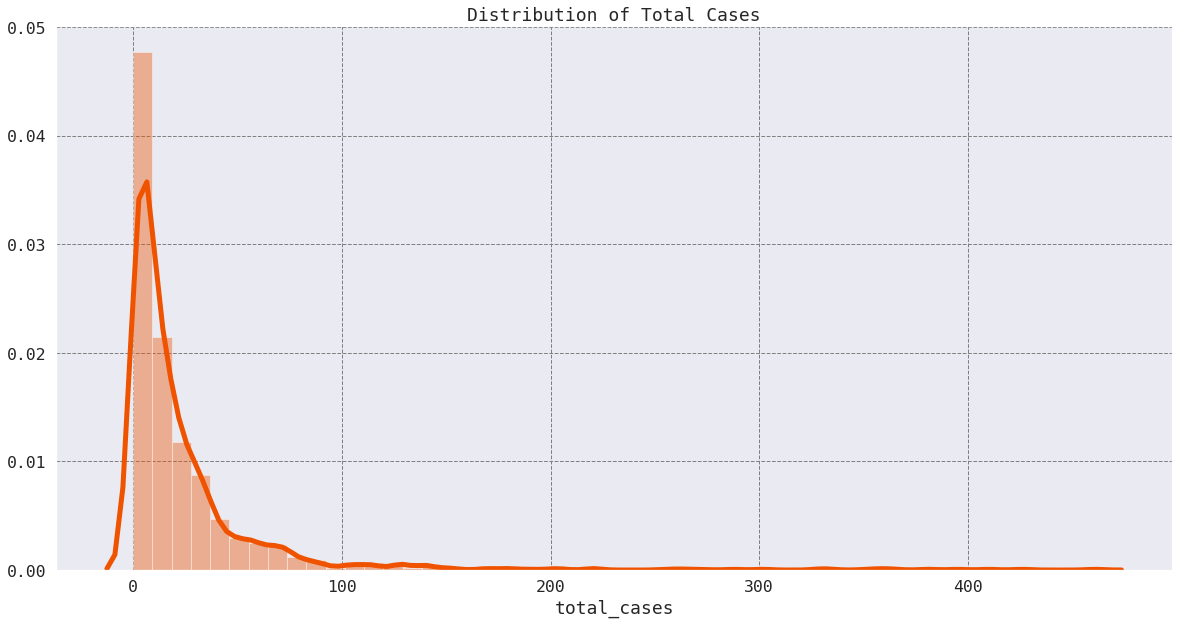

In [49]:
# Check distribution of cases
plt.figure(figsize=(20, 10))
plt.grid(color='gray', linestyle='--')

sns.distplot(df['total_cases'], color=orange)
plt.title('Distribution of Total Cases')

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 1440x720 with 0 Axes>

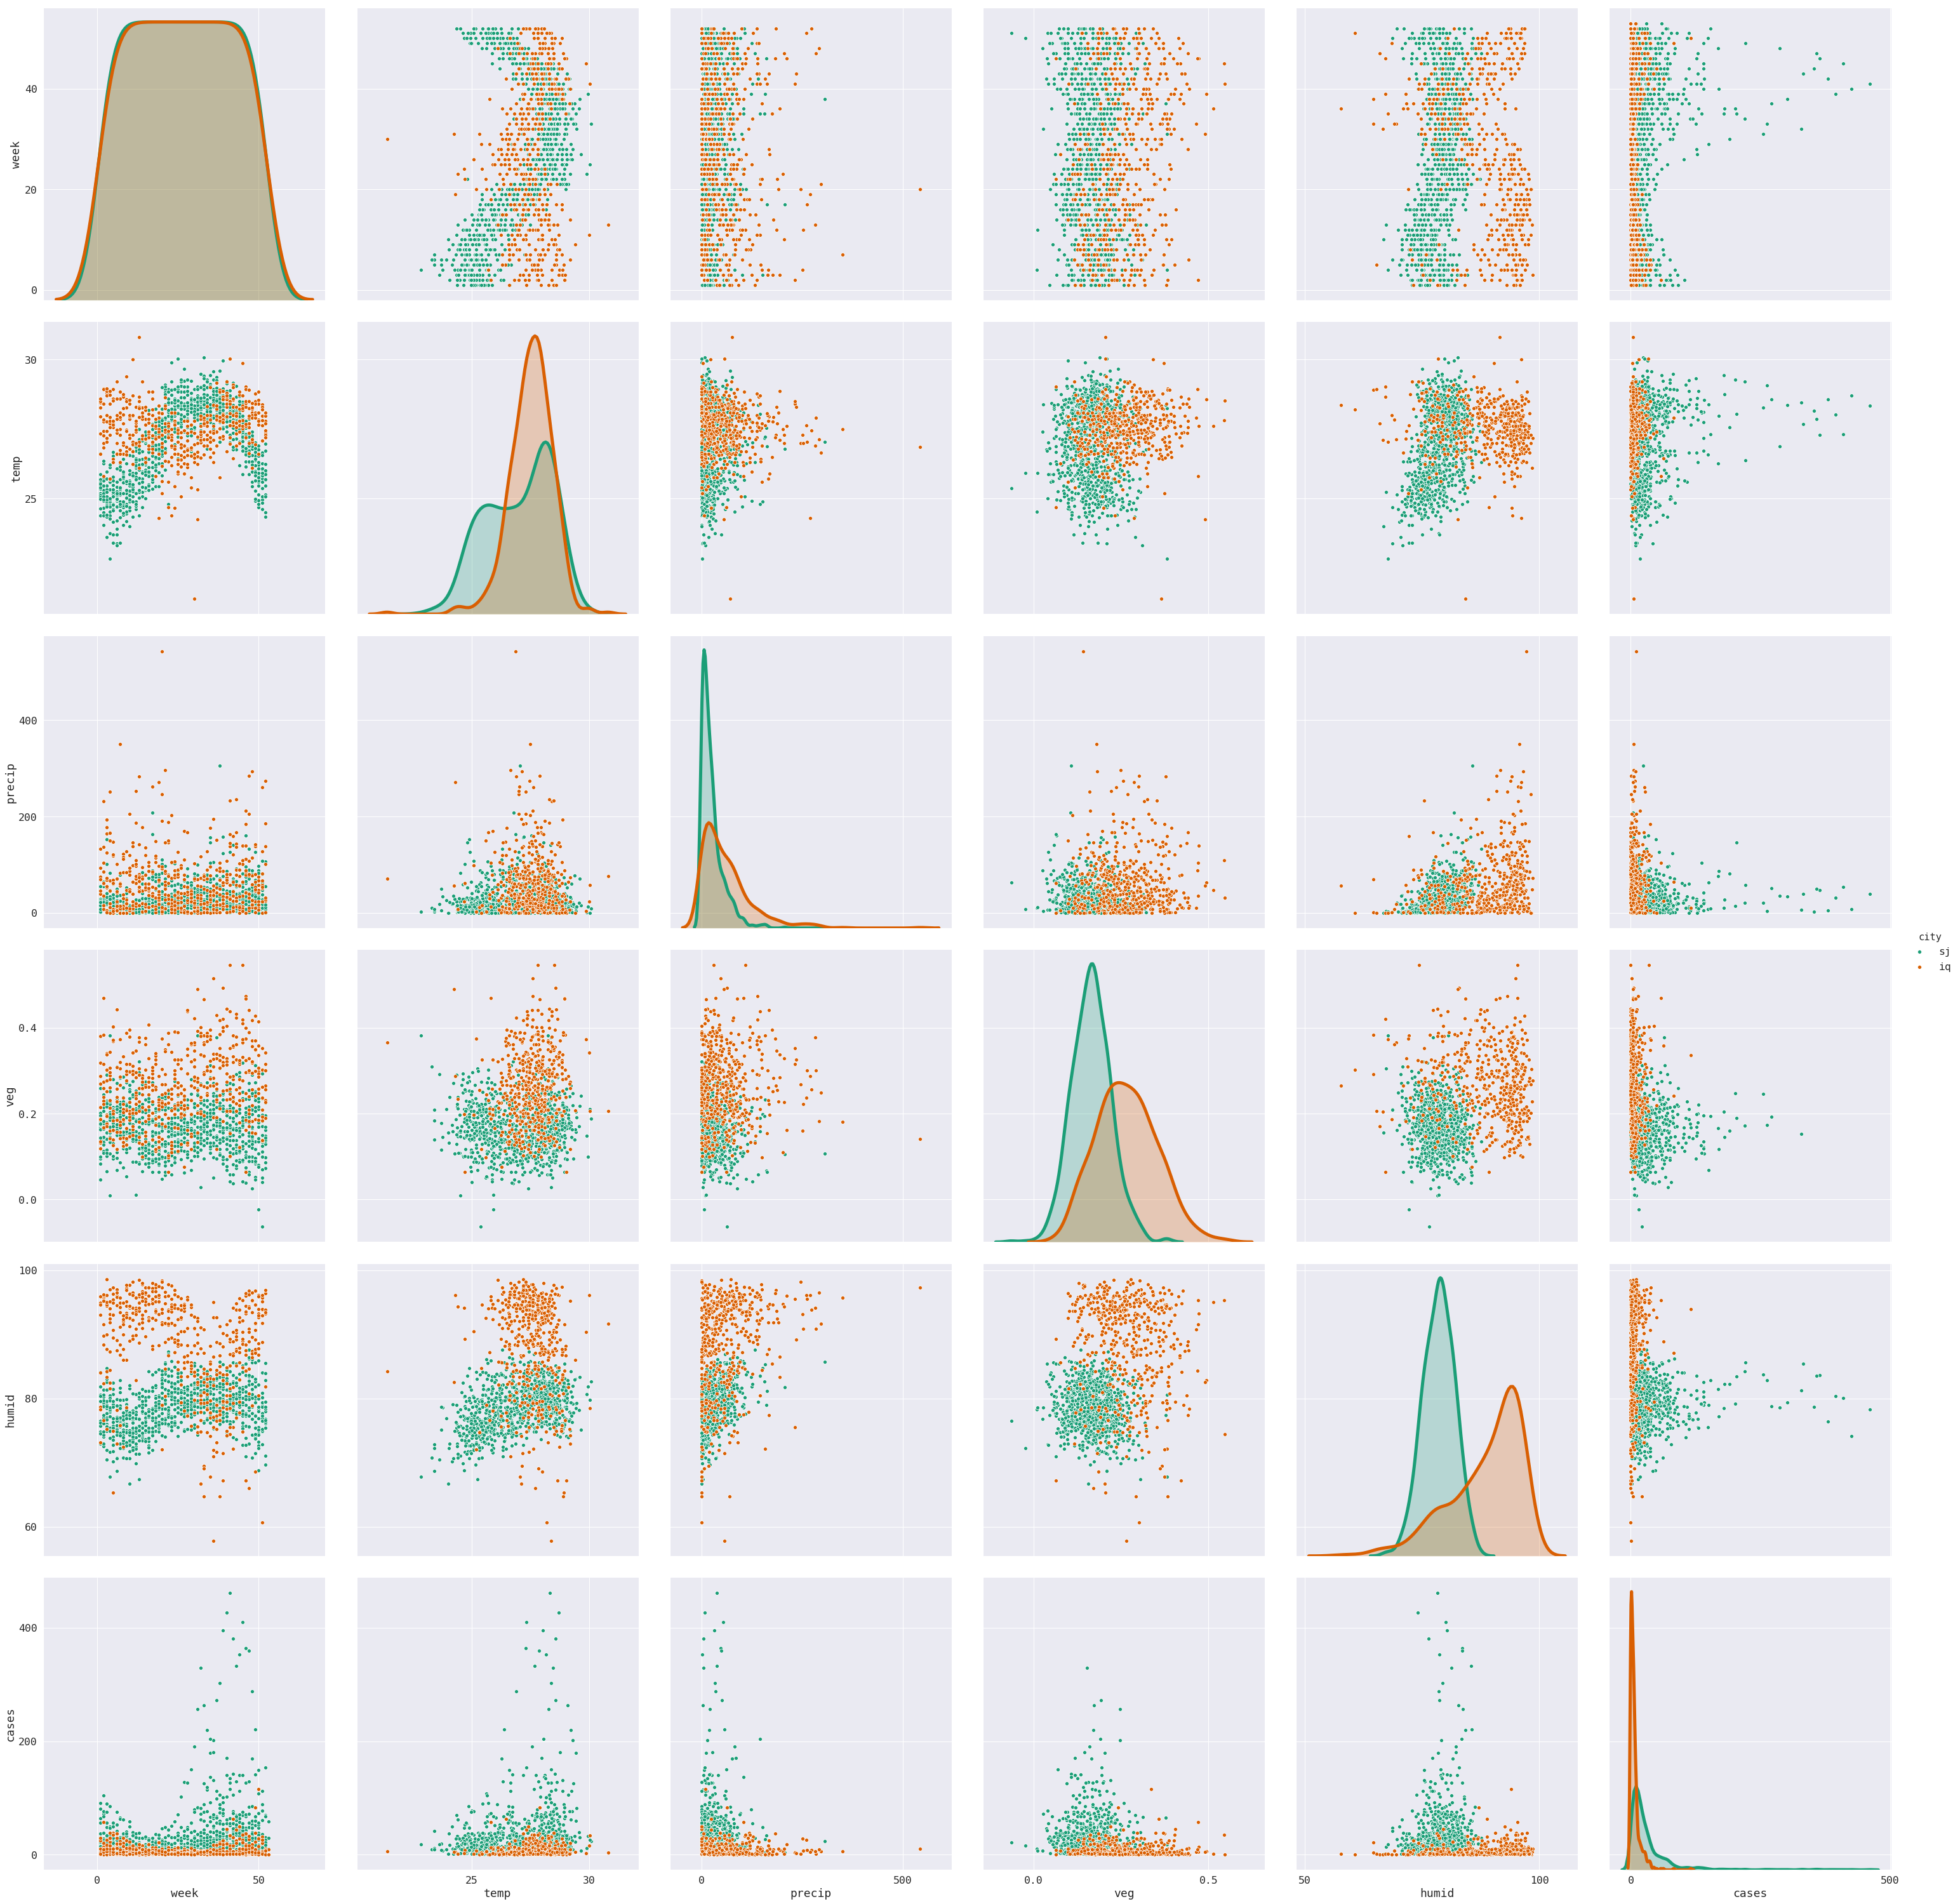

In [8]:
# See sample of data relationships
sample = df[['city','weekofyear', 'station_avg_temp_c', 'station_precip_mm', 'ndvi_sw',
             'reanalysis_relative_humidity_percent', 'total_cases']]
sample.columns = ['city', 'week', 'temp', 'precip', 'veg', 'humid', 'cases']

plt.figure(figsize=(20, 10))

grid = sns.pairplot(sample, hue='city', palette='Dark2', height=7)

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=5, rc={"lines.linewidth": 5})

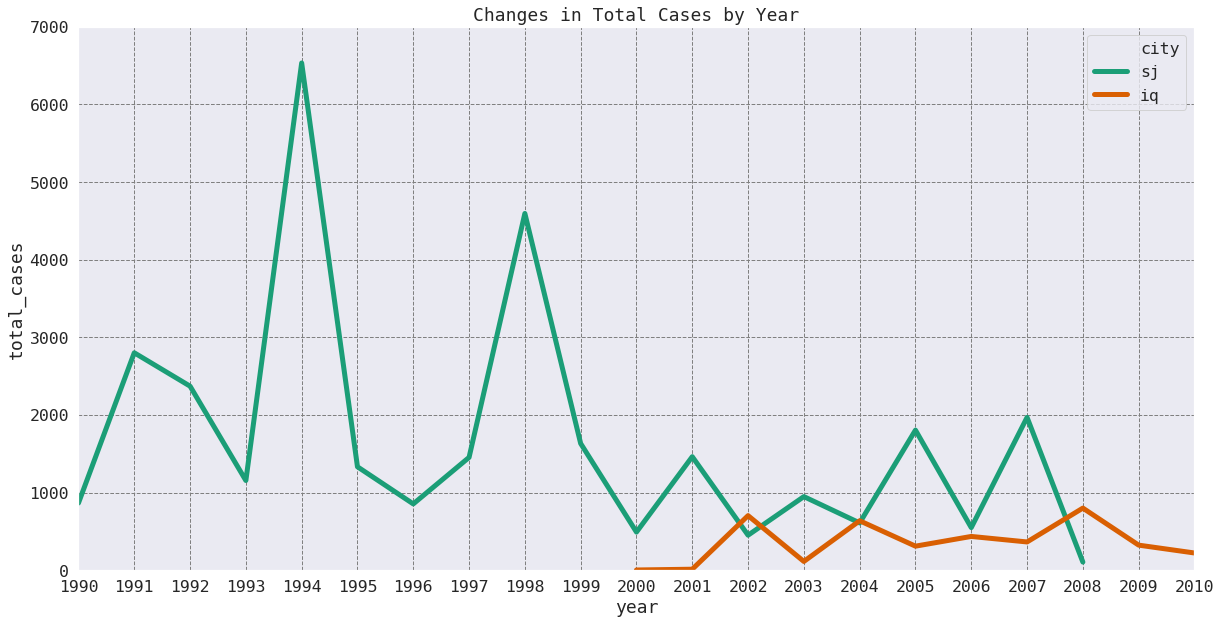

In [27]:
# Change in cases by year, by city
sj = df[df['city'] == 'sj']
iq = df[df['city'] == 'iq']
sj_years = sj.groupby('year').sum()['total_cases'].reset_index()
iq_years = iq.groupby('year').sum()['total_cases'].reset_index()
sj_years['city'] = 'sj'
iq_years['city'] = 'iq'
city_years = pd.concat([sj_years, iq_years])
city_years['year'] = city_years.astype(str)

plt.figure(figsize=(20, 10))
plt.grid(color='gray', linestyle='--')

plt.title('Changes in Total Cases by Year')
sns.lineplot(x='year', y='total_cases', data=city_years, hue='city', palette='Dark2')

plt.ylim(0,7000)
plt.xlim('1990', '2010')

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

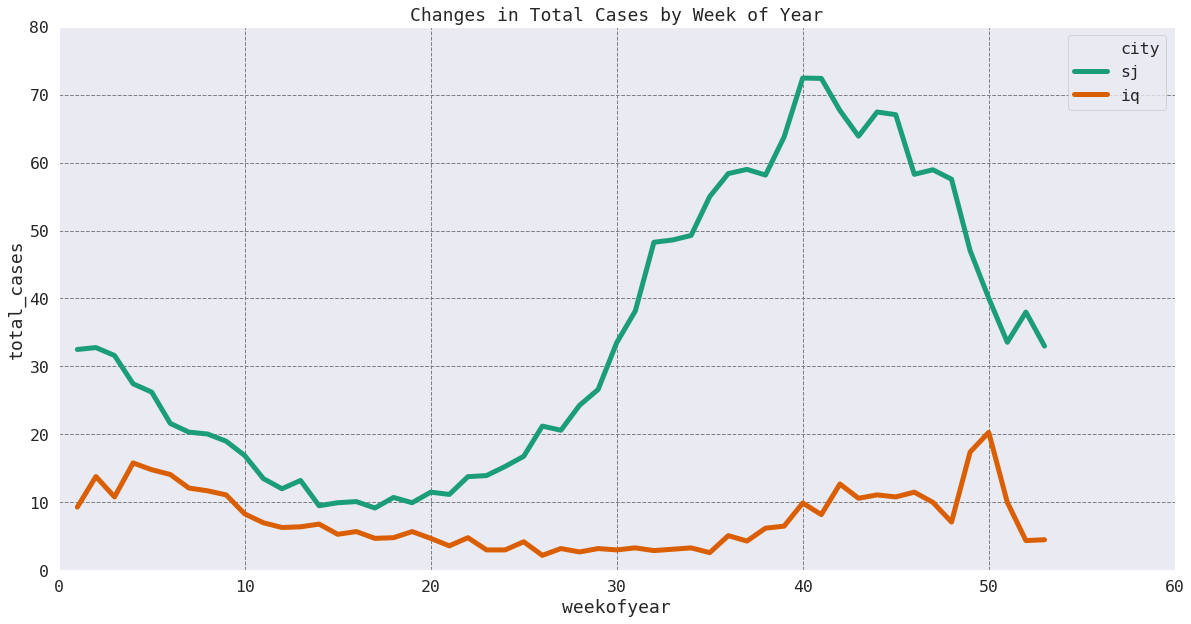

In [10]:
# Change in cases by week, by city
sj = df[df['city'] == 'sj']
iq = df[df['city'] == 'iq']
sj_weeks = sj.groupby('weekofyear').mean()['total_cases'].reset_index()
iq_weeks = iq.groupby('weekofyear').mean()['total_cases'].reset_index()
sj_weeks['city'] = 'sj'
iq_weeks['city'] = 'iq'
city_weeks = pd.concat([sj_weeks, iq_weeks])
city_weeks['weekofyear'] = city_weeks['weekofyear'].astype(int)

plt.figure(figsize=(20, 10))
plt.grid(color='gray', linestyle='--')

plt.title('Changes in Total Cases by Week of Year')
sns.lineplot(x='weekofyear', y='total_cases', data=city_weeks, hue='city', palette='Dark2')

plt.ylim(0,80)
plt.xlim(0,60)

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


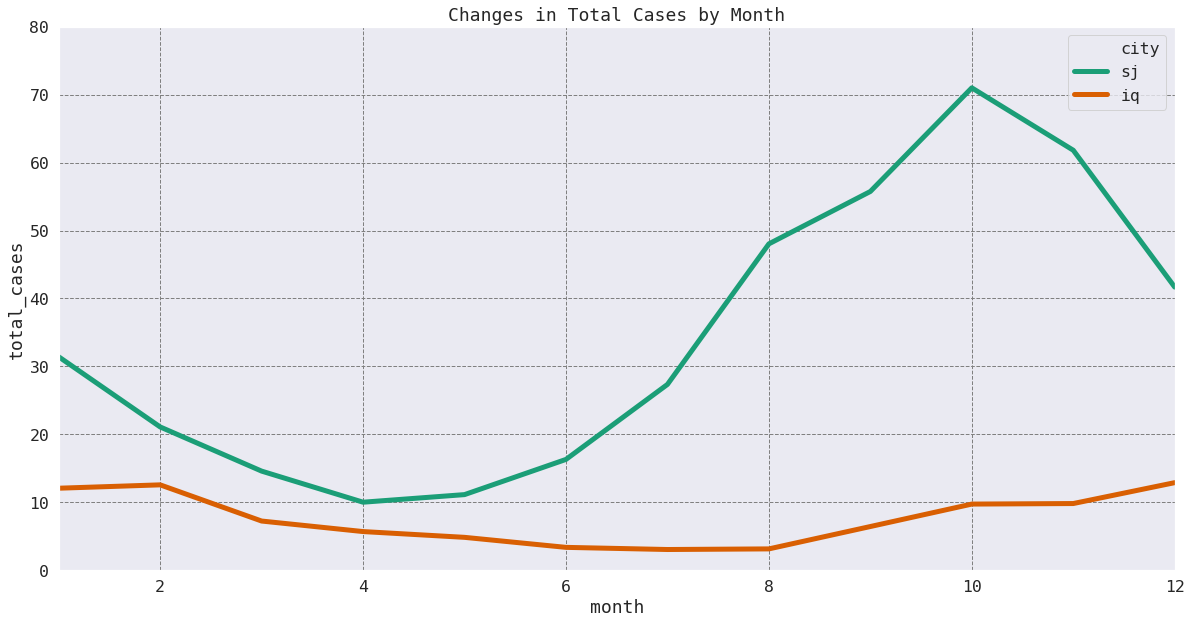

In [11]:
# Change in cases by month, by city
sj = df[df['city'] == 'sj']
iq = df[df['city'] == 'iq']
sj['month'] = sj['week_start_date'].str[5:7]
iq['month'] = iq['week_start_date'].str[5:7]
sj_months = sj.groupby('month').mean()['total_cases'].reset_index()
iq_months = iq.groupby('month').mean()['total_cases'].reset_index()
sj_months['city'] = 'sj'
iq_months['city'] = 'iq'
city_months = pd.concat([sj_months, iq_months])
city_months['month'] = city_months['month'].astype(int)

plt.figure(figsize=(20, 10))
plt.grid(color='gray', linestyle='--')

plt.title('Changes in Total Cases by Month')
sns.lineplot(x='month', y='total_cases', data=city_months, hue='city', palette='Dark2')

plt.ylim(0,80)
plt.xlim(1,12)

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


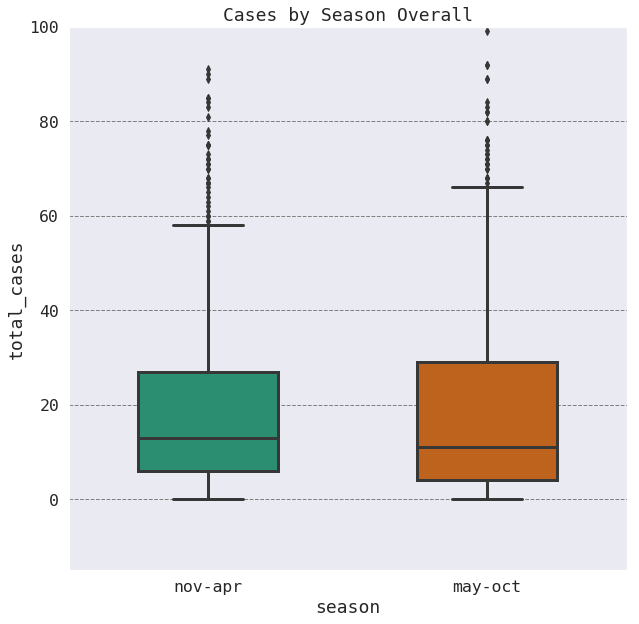

In [12]:
# Total cases in rainy vs. dry seasons
season = df[['city', 'week_start_date', 'total_cases']]
season['month'] = season['week_start_date'].str[5:7]
season['season'] = np.where(season['month'].isin(['05','06','07','08','09','10']), 'may-oct', 'nov-apr')

plt.figure(figsize=(10, 10))
plt.grid(color='gray', linestyle='--')

plt.title('Cases by Season Overall')
plot = sns.boxplot(x='season', y='total_cases', data=season, width=.5, palette='Dark2', linewidth=3)
plt.ylim(-15, 100)

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

In [13]:
# Total cases in rainy vs. dry seasons
rainy = season[season['season'] == 'nov-apr'][['total_cases']]
dry = season[season['season'] == 'may-oct'][['total_cases']]

stats.levene(rainy['total_cases'], dry['total_cases'])
stats.shapiro(rainy['total_cases'])
stats.shapiro(dry['total_cases'])

stats.ttest_ind(rainy['total_cases'], dry['total_cases'])

Ttest_indResult(statistic=-1.950157277613179, pvalue=0.051349322702719025)

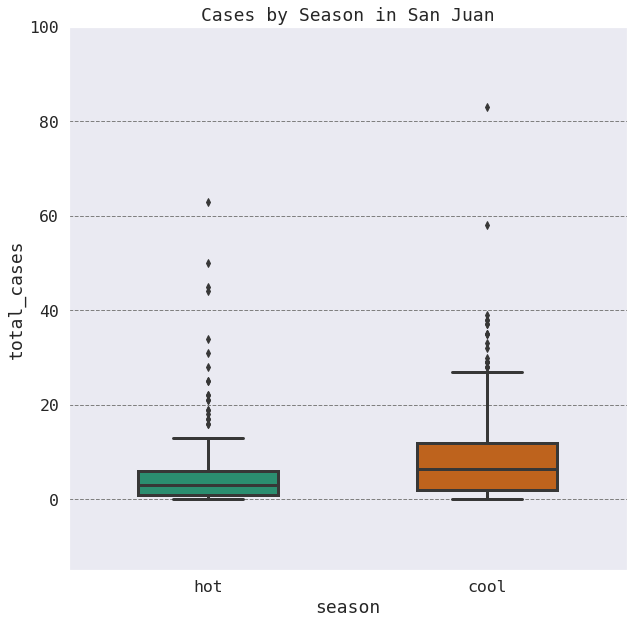

In [14]:
# Total cases in rainy vs. dry seasons in San Juan
season_sj = df[df['city'] == 'iq'][['city', 'week_start_date', 'total_cases']]
season_sj['month'] = season_sj['week_start_date'].str[5:7]
season_sj['season'] = np.where(season_sj['month'].isin(['05','06','07','08','09','10']), 'hot', 'cool')

plt.figure(figsize=(10, 10))
plt.grid(color='gray', linestyle='--')

plt.title('Cases by Season in San Juan')
plot = sns.boxplot(x='season', y='total_cases', data=season_sj, width=.5, palette='Dark2', linewidth=3)
plt.ylim(-15, 100)

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 4})

In [15]:
# Total cases in rainy vs. dry seasons in San Juan
hot = season_sj[season_sj['season'] == 'hot'][['total_cases']]
cool = season_sj[season_sj['season'] == 'cool'][['total_cases']]

stats.levene(hot['total_cases'], cool['total_cases'])
stats.shapiro(hot['total_cases'])
stats.shapiro(cool['total_cases'])

stats.ttest_ind(hot['total_cases'], cool['total_cases'])

Ttest_indResult(statistic=-5.210174706870943, pvalue=2.728220692250593e-07)

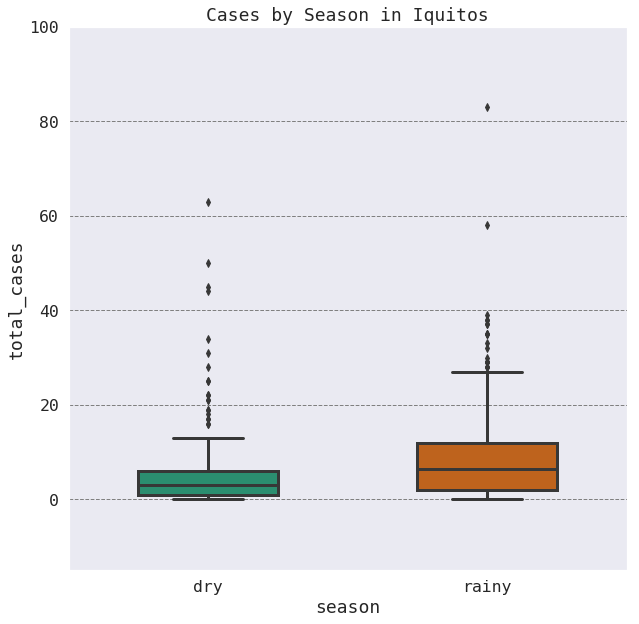

In [16]:
# Total cases in rainy vs. dry seasons in Iquitos
season_iq = df[df['city'] == 'iq'][['city', 'week_start_date', 'total_cases']]
season_iq['month'] = season_iq['week_start_date'].str[5:7]
season_iq['season'] = np.where(season_iq['month'].isin(['05','06','07','08','09','10']), 'dry', 'rainy')

plt.figure(figsize=(10, 10))
plt.grid(color='gray', linestyle='--')

plt.title('Cases by Season in Iquitos')
plot = sns.boxplot(x='season', y='total_cases', data=season_iq, width=.5, palette='Dark2', linewidth=3)
plt.ylim(-15, 100)

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

In [17]:
# Total cases in rainy vs. dry seasons in Iquitos
rainy = season_iq[season_iq['season'] == 'rainy'][['total_cases']]
dry = season_iq[season_iq['season'] == 'dry'][['total_cases']]

stats.levene(rainy['total_cases'], dry['total_cases'])
stats.shapiro(rainy['total_cases'])
stats.shapiro(dry['total_cases'])

stats.ttest_ind(rainy['total_cases'], dry['total_cases'])

Ttest_indResult(statistic=5.210174706870943, pvalue=2.728220692250593e-07)

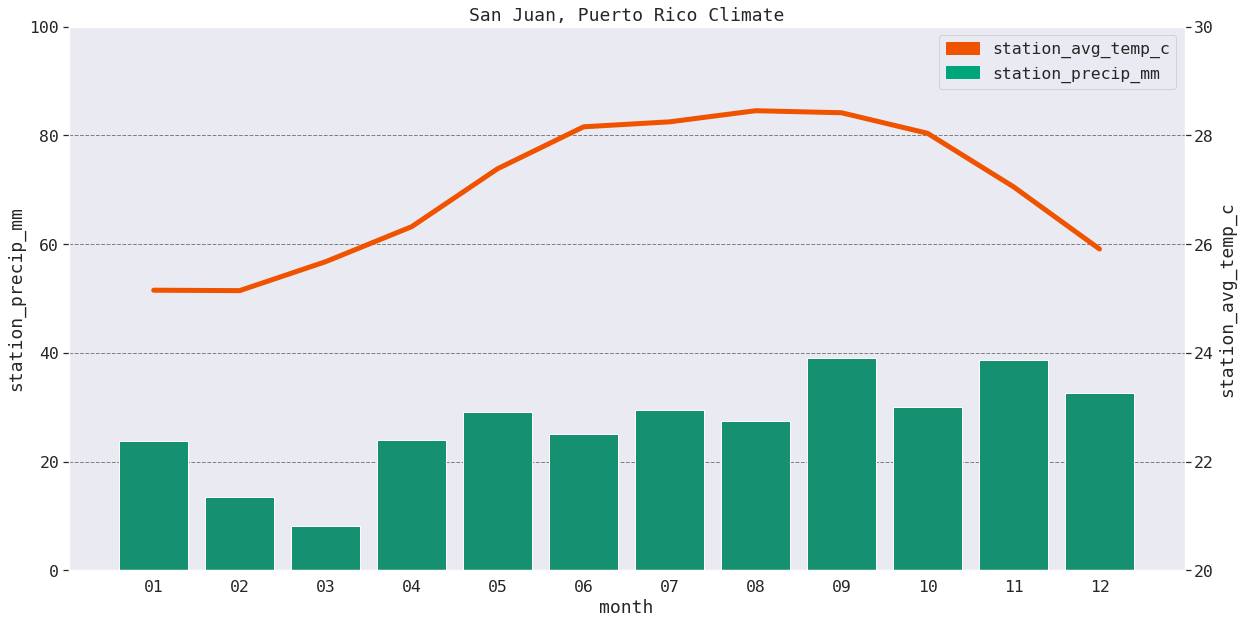

In [18]:
# San Juan climate graph
sj = df[df['city'] == 'sj'][['week_start_date', 'station_precip_mm', 'station_avg_temp_c']]
sj['month'] = sj['week_start_date'].str[5:7]
sj = sj.groupby('month').mean().reset_index()

plt.figure(figsize=(20, 10))
plt.grid(color='gray', linestyle='--')

ax1 = sns.barplot(x='month', y='station_precip_mm', data=sj, color=green)
ax1.set_title('San Juan, Puerto Rico Climate')
plt.setp(ax1.lines,linewidth=0, color=green)
ax1.set_ylim((0, 100))
ax2 = sns.lineplot(x='month', y='station_avg_temp_c', data=sj, color=orange, ax=ax1.twinx())
plt.setp(ax2.lines,linewidth=5)
ax2.set_ylim((20, 30))
ax2.grid(False)

temp = mpatches.Patch(color=orange, label='station_avg_temp_c')
rain = mpatches.Patch(color=green, label='station_precip_mm')
plt.legend(handles=[temp, rain])

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

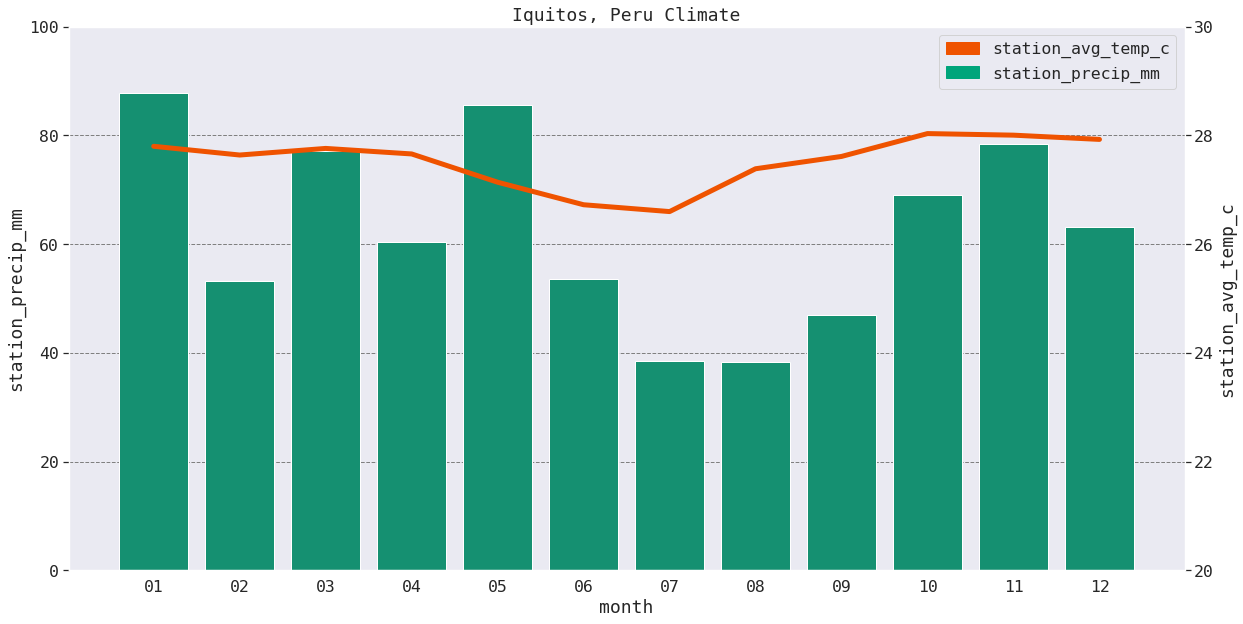

In [19]:
# Iquitos climate graph
iq = df[df['city'] == 'iq'][['week_start_date', 'station_precip_mm', 'station_avg_temp_c']]
iq['month'] = iq['week_start_date'].str[5:7]
iq = iq.groupby('month').mean().reset_index()

plt.figure(figsize=(20, 10))
plt.grid(color='gray', linestyle='--')

ax1 = sns.barplot(x='month', y='station_precip_mm', data=iq, color=green)
ax1.set_title('Iquitos, Peru Climate')
plt.setp(ax1.lines,linewidth=0, color=green)
ax1.set_ylim((0, 100))
ax2 = sns.lineplot(x='month', y='station_avg_temp_c', data=iq, color=orange, ax=ax1.twinx())
plt.setp(ax2.lines,linewidth=5)
ax2.set_ylim((20, 30))
ax2.grid(False)

temp = mpatches.Patch(color=orange, label='station_avg_temp_c')
rain = mpatches.Patch(color=green, label='station_precip_mm')
plt.legend(handles=[temp, rain])

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

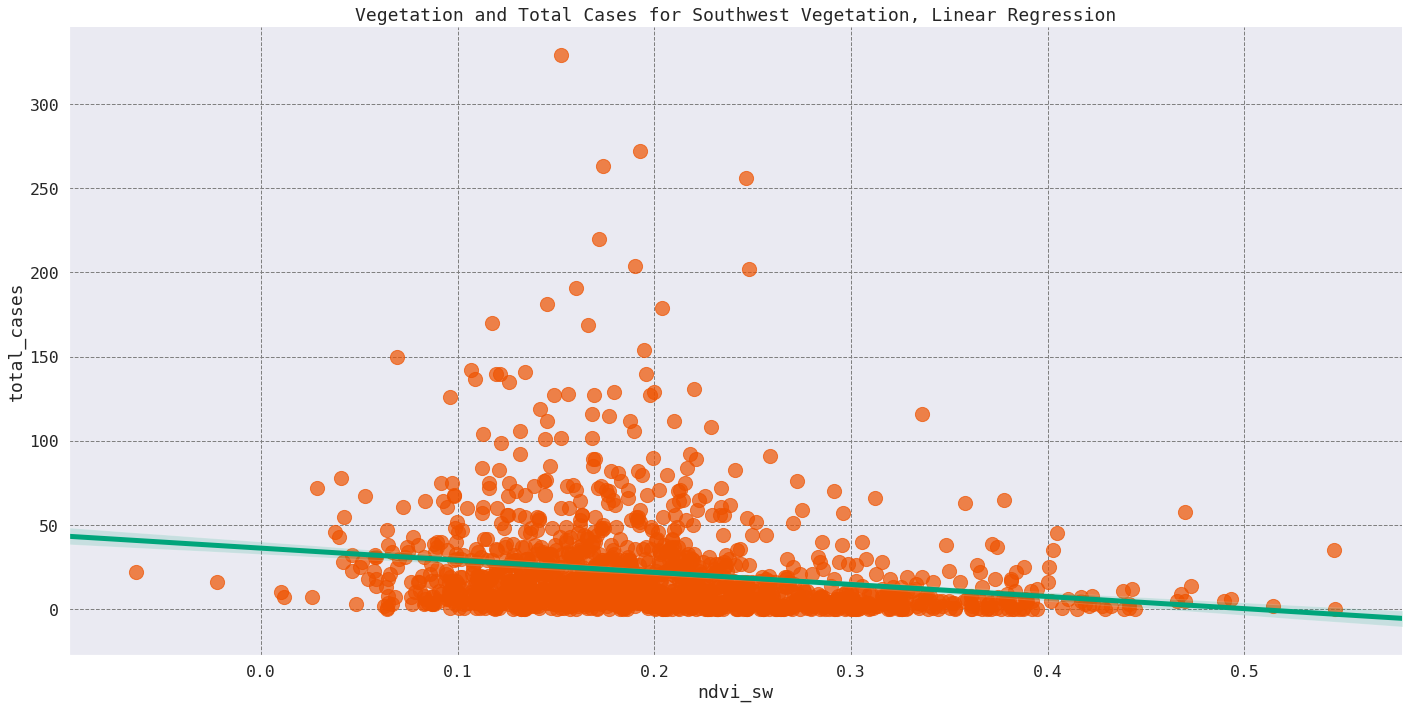

In [20]:
# Vegetation and total cases
sw = df[['ndvi_sw', 'total_cases']].dropna()

ax = sns.lmplot(x='ndvi_sw', y='total_cases', data=sw, fit_reg=True, height=10, aspect=2/1,
                scatter_kws={'s': 200, 'color': orange, 'alpha':.7}, line_kws={'linewidth': 5, 'color': green})
plt.title('Vegetation and Total Cases for Southwest Vegetation, Linear Regression')

plt.grid(color='gray', linestyle='--')

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

In [52]:
# Vegetation and total cases
sw = df[['ndvi_sw', 'total_cases']].dropna()

X = np.array(sw['ndvi_sw']).reshape((-1, 1))
y = sw['total_cases']
model = LinearRegression().fit(X, y)

mae = mean_absolute_error(y,model.predict(X))
r2 = model.score(X, y)
print('mae: ' + str(round(mae, 1)))
print('r2: ' + str(round(r2 * 100, 1)) + '%')

mae: 18.3
r2: 3.9%


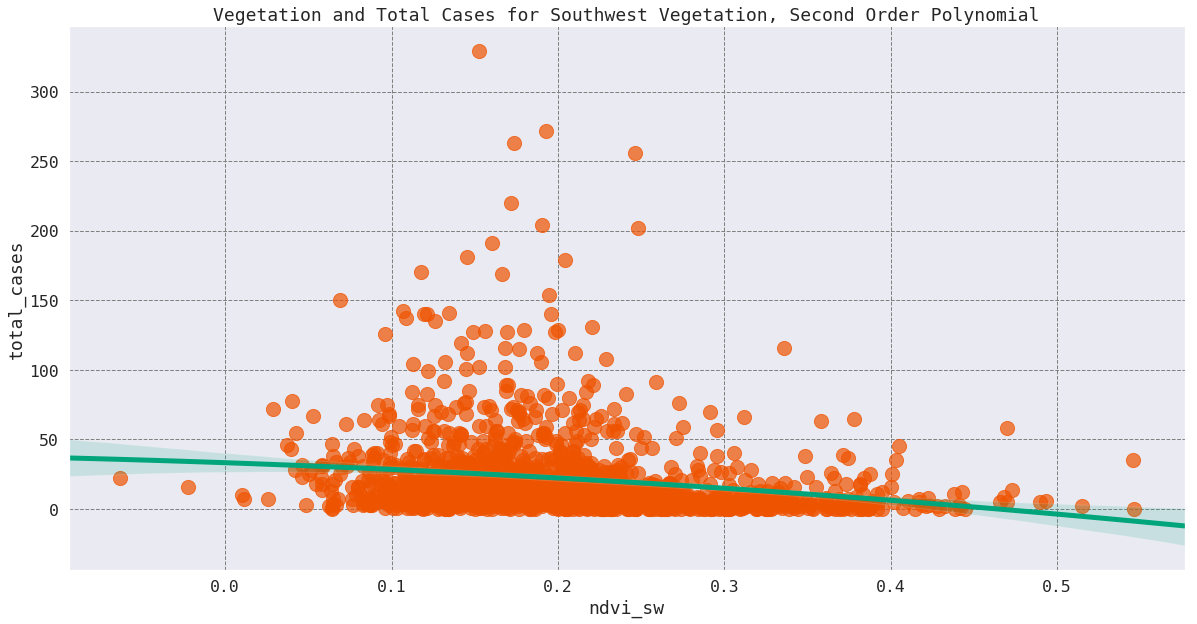

In [22]:
# Vegetation and total cases
sw = df[['ndvi_sw', 'total_cases']].dropna()

plt.figure(figsize=(20, 10))
plt.grid(color='gray', linestyle='--')

sns.regplot(x='ndvi_sw', y='total_cases', order=2, data=sw,  scatter_kws={'s': 200, 'color': orange, 'alpha':.7},
            line_kws={'linewidth': 5, 'color': green})
plt.title('Vegetation and Total Cases for Southwest Vegetation, Second Order Polynomial')

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

In [51]:
# Vegetation and total cases
sw = df[['ndvi_sw', 'total_cases']].dropna()
X = sw['ndvi_sw'][:, np.newaxis]
y = sw['total_cases'][:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

mae = mean_absolute_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print('mae: ' + str(round(mae, 1)))
print('r2: ' + str(round(r2 * 100, 1)) + '%')

mae: 18.4
r2: 3.9%


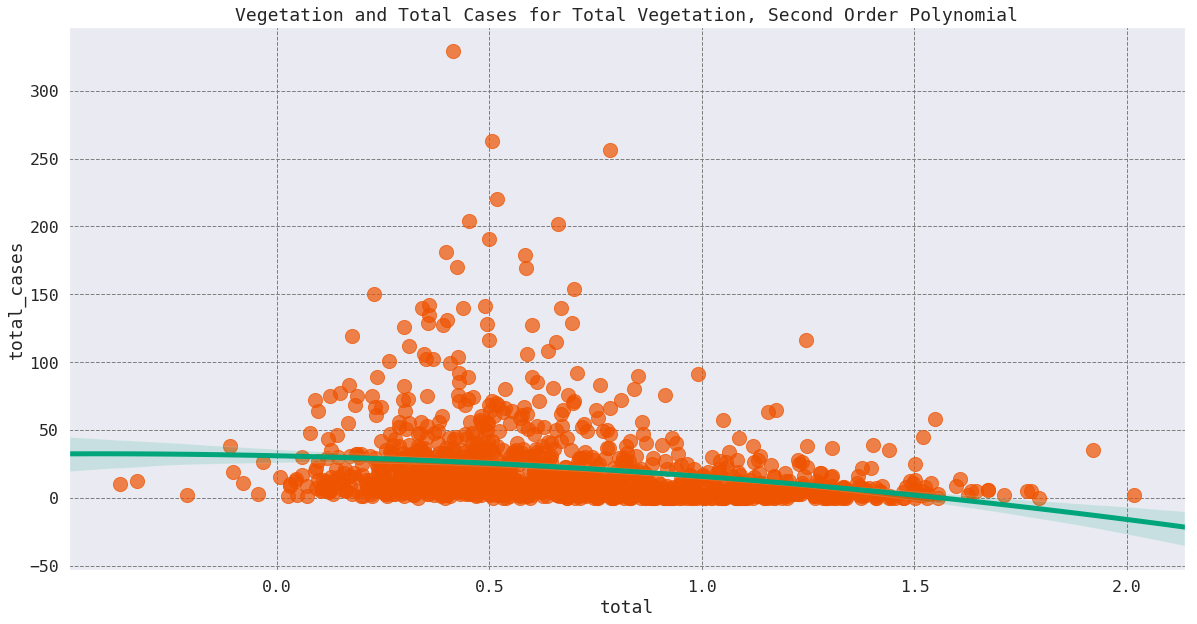

In [24]:
# Vegetation and total cases
total_veg = df[['ndvi_sw', 'ndvi_nw', 'ndvi_se', 'ndvi_ne', 'total_cases']].dropna()
total_veg['total'] = total_veg['ndvi_sw'] + total_veg['ndvi_nw'] + total_veg['ndvi_se'] + total_veg['ndvi_ne']

plt.figure(figsize=(20, 10))
plt.grid(color='gray', linestyle='--')

sns.regplot(x='total', y='total_cases', order=2, data=total_veg,  scatter_kws={'s': 200, 'color': orange,
            'alpha':.7}, line_kws={'linewidth': 5, 'color': green})
plt.title('Vegetation and Total Cases for Total Vegetation, Second Order Polynomial')

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

In [53]:
# Vegetation and total cases
total_veg = df[['ndvi_sw', 'ndvi_nw', 'ndvi_se', 'ndvi_ne', 'total_cases']].dropna()
total_veg['total'] = total_veg['ndvi_sw'] + total_veg['ndvi_nw'] + total_veg['ndvi_se'] + total_veg['ndvi_ne']
X = total_veg['total'][:, np.newaxis]
y = total_veg['total_cases'][:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

mae = mean_absolute_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print('mae: ' + str(round(mae, 1)))
print('r2: ' + str(round(r2 * 100, 1)) + '%')

mae: 17.8
r2: 6.2%


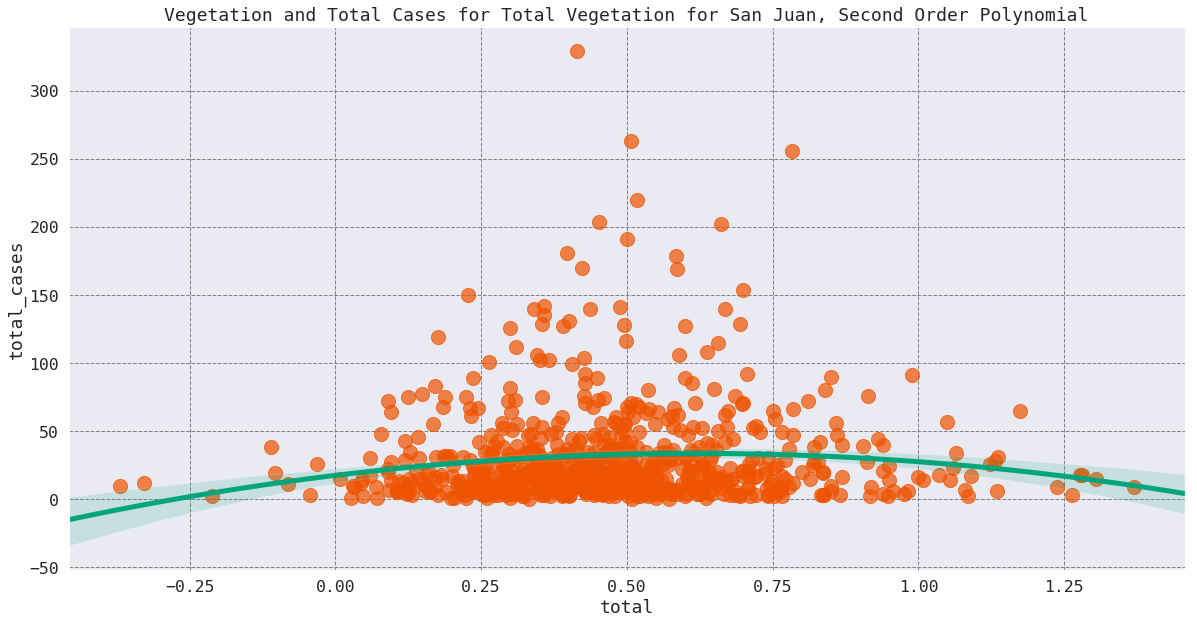

In [36]:
# Vegetation and total cases for San Juan
total_veg = df[df['city'] == 'sj'][['ndvi_sw', 'ndvi_nw', 'ndvi_se', 'ndvi_ne', 'total_cases']].dropna()
total_veg['total'] = total_veg['ndvi_sw'] + total_veg['ndvi_nw'] + total_veg['ndvi_se'] + total_veg['ndvi_ne']

plt.figure(figsize=(20, 10))
plt.grid(color='gray', linestyle='--')

sns.regplot(x='total', y='total_cases', order=2, data=total_veg,  scatter_kws={'s': 200, 'color': orange,
            'alpha':.7}, line_kws={'linewidth': 5, 'color': green})
plt.title('Vegetation and Total Cases for Total Vegetation for San Juan, Second Order Polynomial')

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

In [54]:
# Vegetation and total cases for San Juan
total_veg = df[df['city'] == 'sj'][['ndvi_sw', 'ndvi_nw', 'ndvi_se', 'ndvi_ne', 'total_cases']].dropna()
total_veg['total'] = total_veg['ndvi_sw'] + total_veg['ndvi_nw'] + total_veg['ndvi_se'] + total_veg['ndvi_ne']
X = total_veg['total'][:, np.newaxis]
y = total_veg['total_cases'][:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

mae = mean_absolute_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print('mae: ' + str(round(mae, 1)))
print('r2: ' + str(round(r2 * 100, 1)) + '%')

mae: 23.1
r2: 1.4%


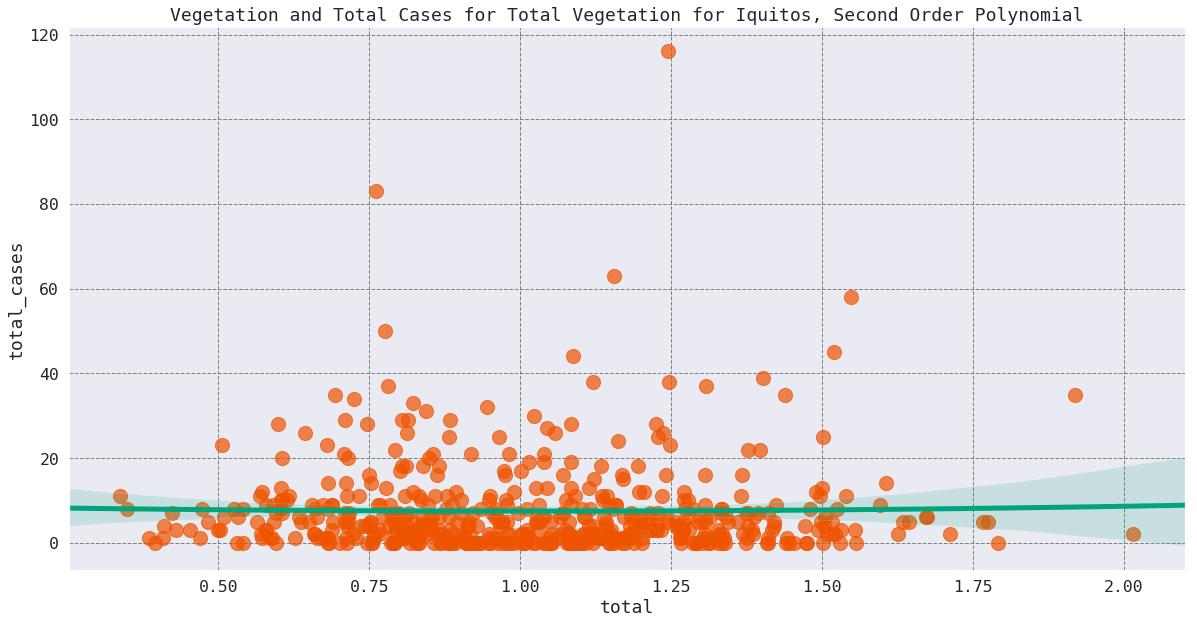

In [37]:
# Vegetation and total cases for Iquitos
total_veg = df[df['city'] == 'iq'][['ndvi_sw', 'ndvi_nw', 'ndvi_se', 'ndvi_ne', 'total_cases']].dropna()
total_veg['total'] = total_veg['ndvi_sw'] + total_veg['ndvi_nw'] + total_veg['ndvi_se'] + total_veg['ndvi_ne']

plt.figure(figsize=(20, 10))
plt.grid(color='gray', linestyle='--')

sns.regplot(x='total', y='total_cases', order=2, data=total_veg,  scatter_kws={'s': 200, 'color': orange,
            'alpha':.7}, line_kws={'linewidth': 5, 'color': green})
plt.title('Vegetation and Total Cases for Total Vegetation for Iquitos, Second Order Polynomial')

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

In [55]:
# Vegetation and total cases for Iquitos
total_veg = df[df['city'] == 'iq'][['ndvi_sw', 'ndvi_nw', 'ndvi_se', 'ndvi_ne', 'total_cases']].dropna()
total_veg['total'] = total_veg['ndvi_sw'] + total_veg['ndvi_nw'] + total_veg['ndvi_se'] + total_veg['ndvi_ne']
X = total_veg['total'][:, np.newaxis]
y = total_veg['total_cases'][:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

mae = mean_absolute_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print('mae: ' + str(round(mae, 1)))
print('r2: ' + str(round(r2 * 100, 1)) + '%')

mae: 6.7
r2: 0.0%


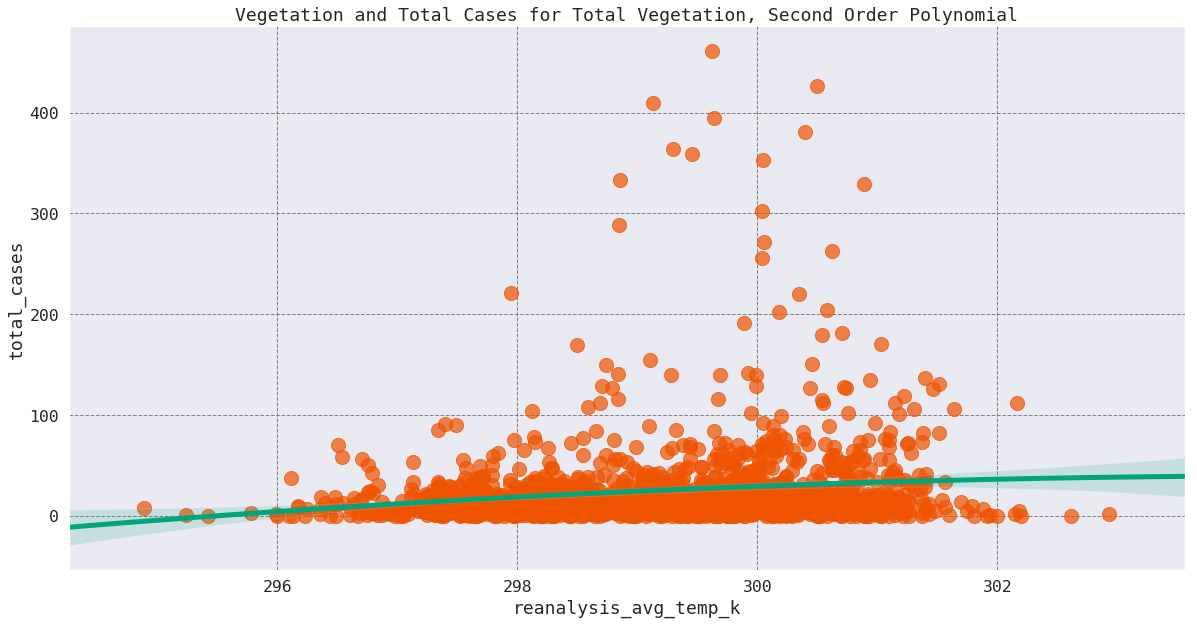

In [68]:
# Temperature and total cases
temp = df[['reanalysis_avg_temp_k', 'total_cases']].dropna()

plt.figure(figsize=(20, 10))
plt.grid(color='gray', linestyle='--')

sns.regplot(x='reanalysis_avg_temp_k', y='total_cases', order=2, data=temp,  scatter_kws={'s': 200, 'color': orange,
            'alpha':.7}, line_kws={'linewidth': 5, 'color': green})
plt.title('Vegetation and Total Cases for Total Vegetation, Second Order Polynomial')

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

In [67]:
# Temperature and total cases
temp = df[['reanalysis_avg_temp_k', 'total_cases']].dropna()
X = temp['reanalysis_avg_temp_k'][:, np.newaxis]
y = temp['total_cases'][:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

mae = mean_absolute_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print('mae: ' + str(round(mae, 1)))
print('r2: ' + str(round(r2 * 100, 1)) + '%')

mae: 22.7
r2: 2.3%


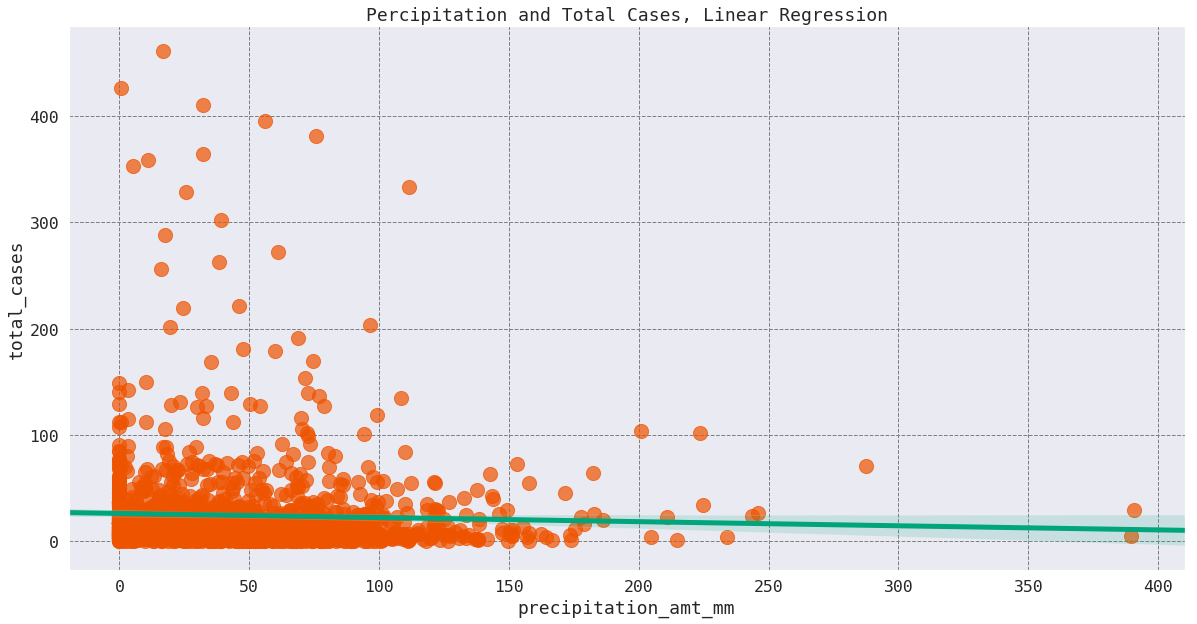

In [81]:
# Percipitation and total cases
perc = df[['precipitation_amt_mm', 'total_cases']].dropna()

plt.figure(figsize=(20, 10))
plt.grid(color='gray', linestyle='--')

sns.regplot(x='precipitation_amt_mm', y='total_cases', order=1, data=perc,  scatter_kws={'s': 200, 'color': orange,
            'alpha':.7}, line_kws={'linewidth': 5, 'color': green})
plt.title('Percipitation and Total Cases, Linear Regression')

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

In [79]:
# Percipitation and total cases
perc = df[['precipitation_amt_mm', 'total_cases']].dropna()
X = perc['precipitation_amt_mm'][:, np.newaxis]
y = perc['total_cases'][:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

mae = mean_absolute_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print('mae: ' + str(round(mae, 1)))
print('r2: ' + str(round(r2 * 100, 1)) + '%')

mae: 23.0
r2: 0.2%


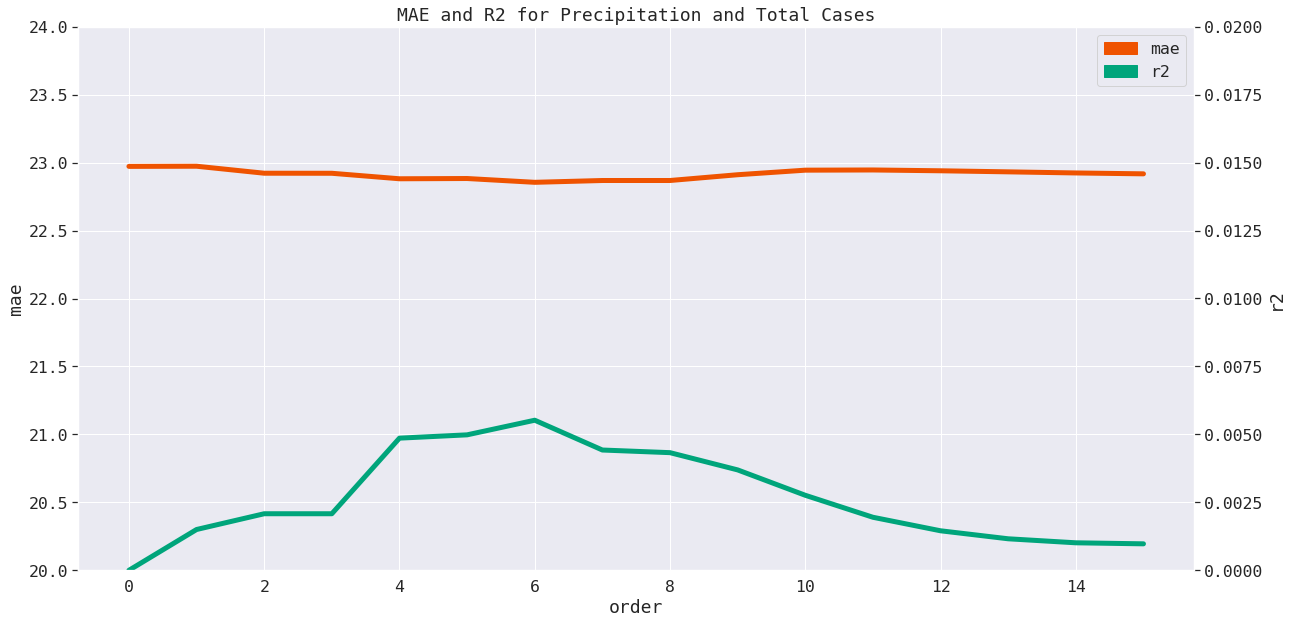

In [156]:
# Percipitation and total cases
perc = df[['precipitation_amt_mm', 'total_cases']].dropna()
X = perc['precipitation_amt_mm'][:, np.newaxis]
y = perc['total_cases'][:, np.newaxis]

mae = []
r2 = []

for i in range(0,16):
    polynomial_features = PolynomialFeatures(degree=i)
    
    x_poly = polynomial_features.fit_transform(X)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    mae.append(mean_absolute_error(y,y_poly_pred))
    r2.append(r2_score(y,y_poly_pred))

orders = pd.DataFrame({'mae': mae, 'r2': r2}).reset_index().rename(columns={'index': 'order'})

plt.figure(figsize=(20, 10))
ax1 = sns.lineplot(x=orders['order'], y=orders['mae'], color=orange)
ax2 = sns.lineplot(x=orders['order'], y=orders['r2'], ax=ax1.twinx(), color=green)
plt.title('MAE and R2 for Precipitation and Total Cases')
ax2.grid(False)
ax1.set_ylim(20,24)
ax2.set_ylim(0,.02)

mae_l = mpatches.Patch(color=orange, label='mae')
r2_l = mpatches.Patch(color=green, label='r2')
plt.legend(handles=[mae_l, r2_l])

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

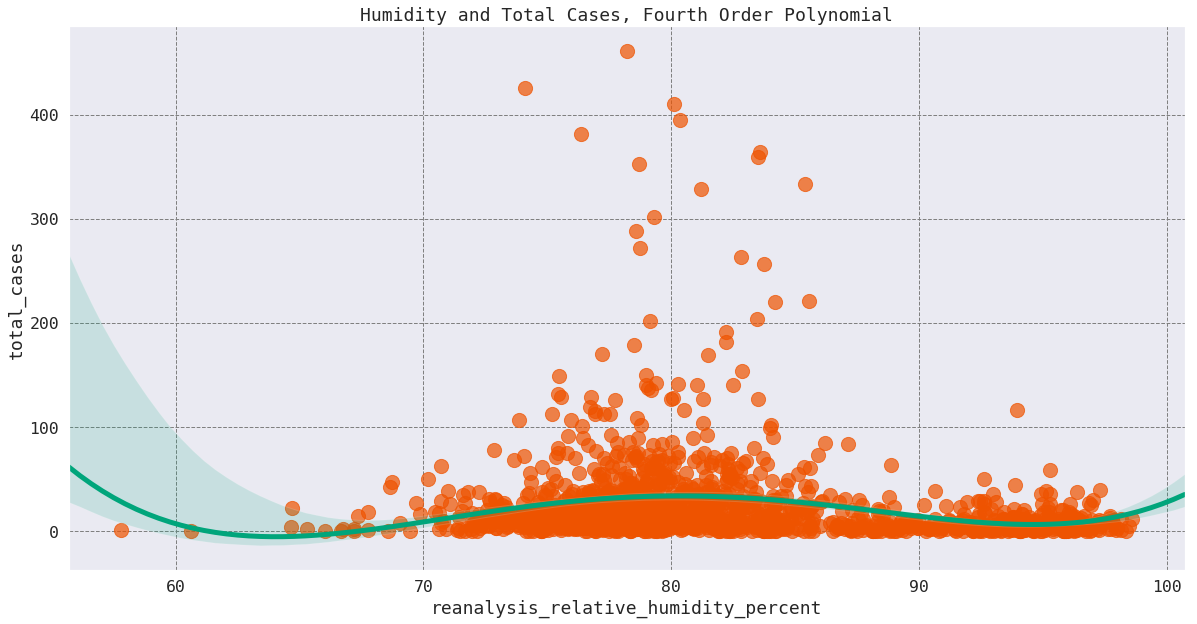

In [130]:
# Humidity and total cases
humi = df[['reanalysis_relative_humidity_percent', 'total_cases']].dropna()

plt.figure(figsize=(20, 10))
plt.grid(color='gray', linestyle='--')

sns.regplot(x='reanalysis_relative_humidity_percent', y='total_cases', order=4, data=humi,  scatter_kws={'s': 200,
            'color': orange, 'alpha':.7}, line_kws={'linewidth': 5, 'color': green})
plt.title('Humidity and Total Cases, Fourth Order Polynomial')

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

In [129]:
# Humidity and total cases
humi = df[['reanalysis_relative_humidity_percent', 'total_cases']].dropna()
X = humi['reanalysis_relative_humidity_percent'][:, np.newaxis]
y = humi['total_cases'][:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

mae = mean_absolute_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print('mae: ' + str(round(mae, 1)))
print('r2: ' + str(round(r2 * 100, 1)) + '%')

mae: 21.7
r2: 5.2%


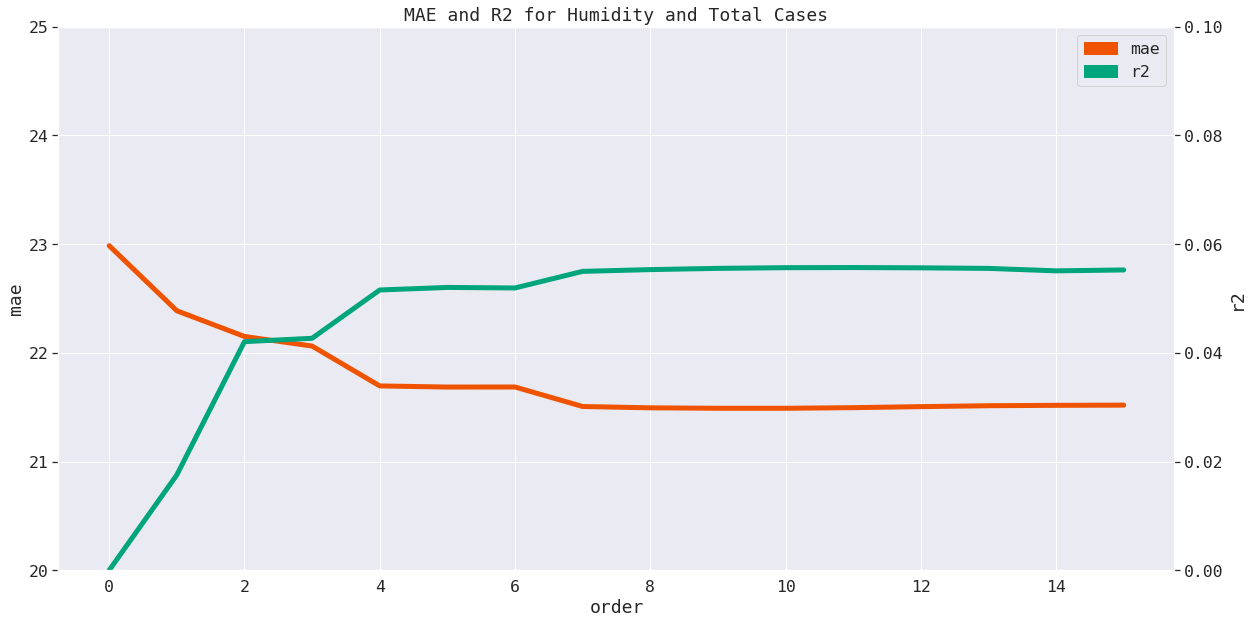

In [149]:
# Humidity and total cases
humi = df[['reanalysis_relative_humidity_percent', 'total_cases']].dropna()
X = humi['reanalysis_relative_humidity_percent'][:, np.newaxis]
y = humi['total_cases'][:, np.newaxis]

mae = []
r2 = []

for i in range(0,16):
    polynomial_features = PolynomialFeatures(degree=i)
    
    x_poly = polynomial_features.fit_transform(X)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    mae.append(mean_absolute_error(y,y_poly_pred))
    r2.append(r2_score(y,y_poly_pred))

orders = pd.DataFrame({'mae': mae, 'r2': r2}).reset_index().rename(columns={'index': 'order'})

plt.figure(figsize=(20, 10))
ax1 = sns.lineplot(x=orders['order'], y=orders['mae'], color=orange)
ax2 = sns.lineplot(x=orders['order'], y=orders['r2'], ax=ax1.twinx(), color=green)
plt.title('MAE and R2 for Humidity and Total Cases')
ax2.grid(False)
ax1.set_ylim(20,25)
ax2.set_ylim(0,.1)

mae_l = mpatches.Patch(color=orange, label='mae')
r2_l = mpatches.Patch(color=green, label='r2')
plt.legend(handles=[mae_l, r2_l])

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

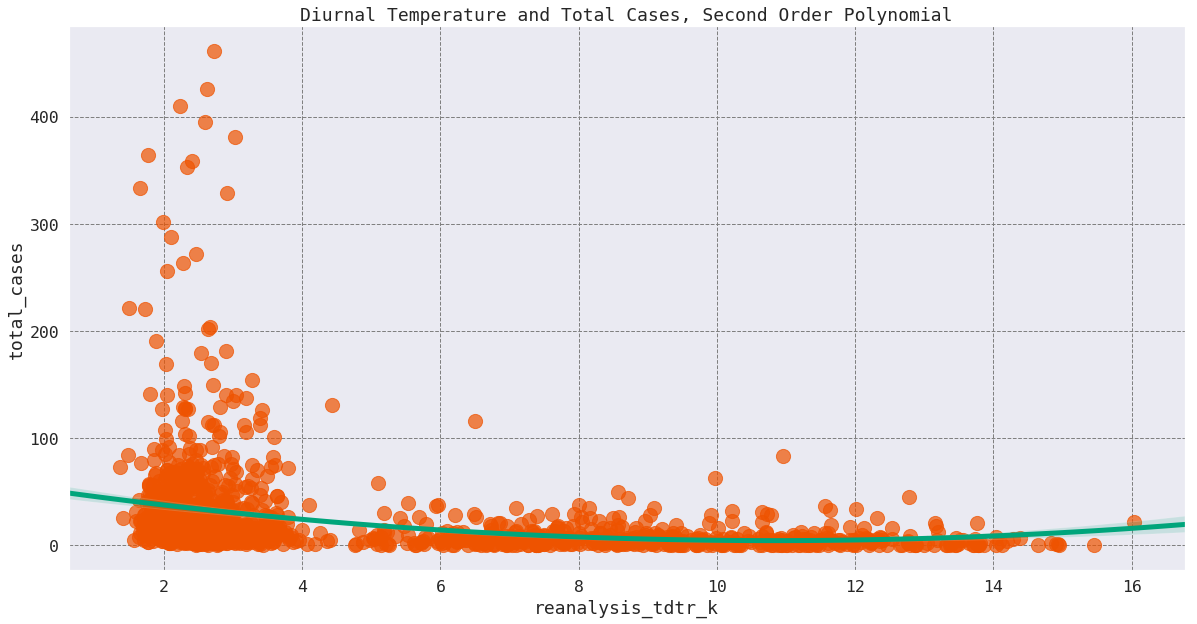

In [154]:
# Diurnal temperature range and total cases
diur = df[['reanalysis_tdtr_k', 'total_cases']].dropna()

plt.figure(figsize=(20, 10))
plt.grid(color='gray', linestyle='--')

sns.regplot(x='reanalysis_tdtr_k', y='total_cases', order=2, data=diur,  scatter_kws={'s': 200, 'color': orange,
            'alpha':.7}, line_kws={'linewidth': 5, 'color': green})
plt.title('Diurnal Temperature and Total Cases, Second Order Polynomial')

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

In [150]:
# Diurnal temperature range and total cases
diur = df[['reanalysis_tdtr_k', 'total_cases']].dropna()
X = diur['reanalysis_tdtr_k'][:, np.newaxis]
y = diur['total_cases'][:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

mae = mean_absolute_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print('mae: ' + str(round(mae, 1)))
print('r2: ' + str(round(r2 * 100, 1)) + '%')

mae: 20.6
r2: 8.7%


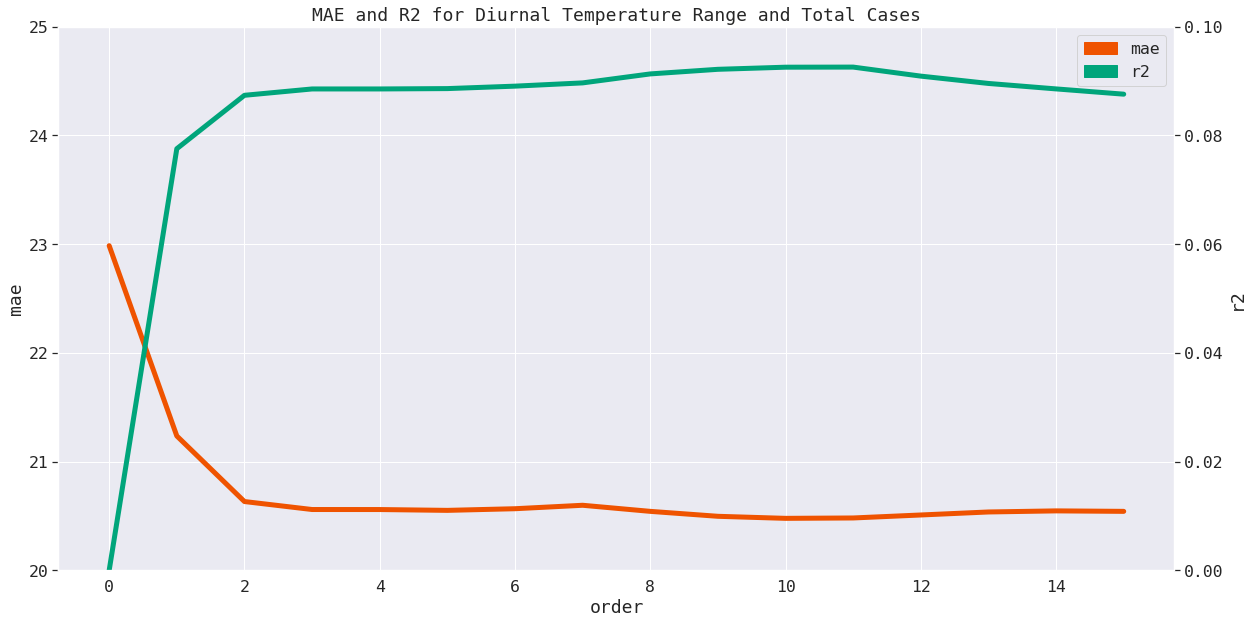

In [153]:
# Diurnal temperature range and total cases
diur = df[['reanalysis_tdtr_k', 'total_cases']].dropna()
X = diur['reanalysis_tdtr_k'][:, np.newaxis]
y = diur['total_cases'][:, np.newaxis]

mae = []
r2 = []

for i in range(0,16):
    polynomial_features = PolynomialFeatures(degree=i)
    
    x_poly = polynomial_features.fit_transform(X)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    mae.append(mean_absolute_error(y,y_poly_pred))
    r2.append(r2_score(y,y_poly_pred))

orders = pd.DataFrame({'mae': mae, 'r2': r2}).reset_index().rename(columns={'index': 'order'})

plt.figure(figsize=(20, 10))
ax1 = sns.lineplot(x=orders['order'], y=orders['mae'], color=orange)
ax2 = sns.lineplot(x=orders['order'], y=orders['r2'], ax=ax1.twinx(), color=green)
plt.title('MAE and R2 for Diurnal Temperature Range and Total Cases')
ax2.grid(False)
ax1.set_ylim(20,25)
ax2.set_ylim(0,.1)

mae_l = mpatches.Patch(color=orange, label='mae')
r2_l = mpatches.Patch(color=green, label='r2')
plt.legend(handles=[mae_l, r2_l])

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip